In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!unzip /content/drive/MyDrive/creditcard.csv.zip

Archive:  /content/drive/MyDrive/creditcard.csv.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df = pd.read_csv('/content/creditcard.csv')

We need to reduce some feature whichs useless

In [8]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Có 28 giá trị bị ẩn, và chỉ có 3 thuộc tính được biết là Amount và Class và time

# EDA

0: Fraud, 1: Not Fraud

In [10]:
dict_class = df['Class'].value_counts().to_dict()

In [ ]:
dict_class.values

<function dict.values>

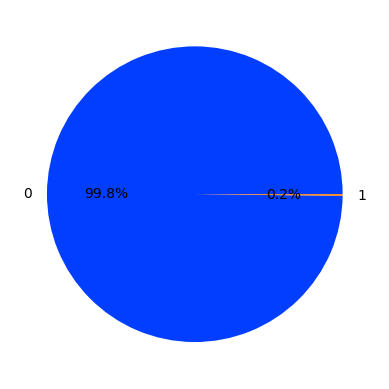

In [11]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

# declaring data
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')

# plotting data on chart
plt.pie(dict_class.values(), labels=dict_class.keys(), colors=palette_color, autopct='%1.1f%%')

# displaying chart
plt.show()


Bị Unbalance Nặng

<Axes: >

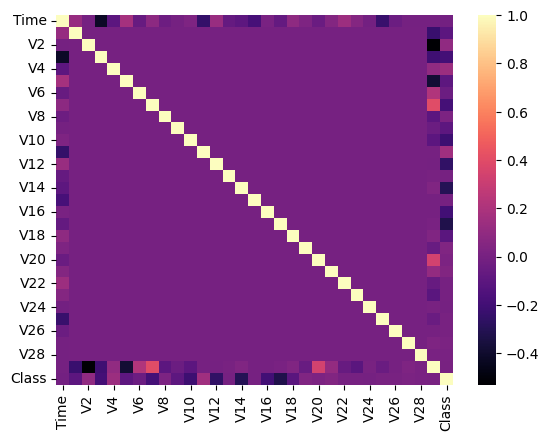

In [ ]:
sns.heatmap(df.corr(),cmap = 'magma',cbar = True)

**Correlate between Target Feature and Other**

In [12]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()

In [13]:
corr

,0
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


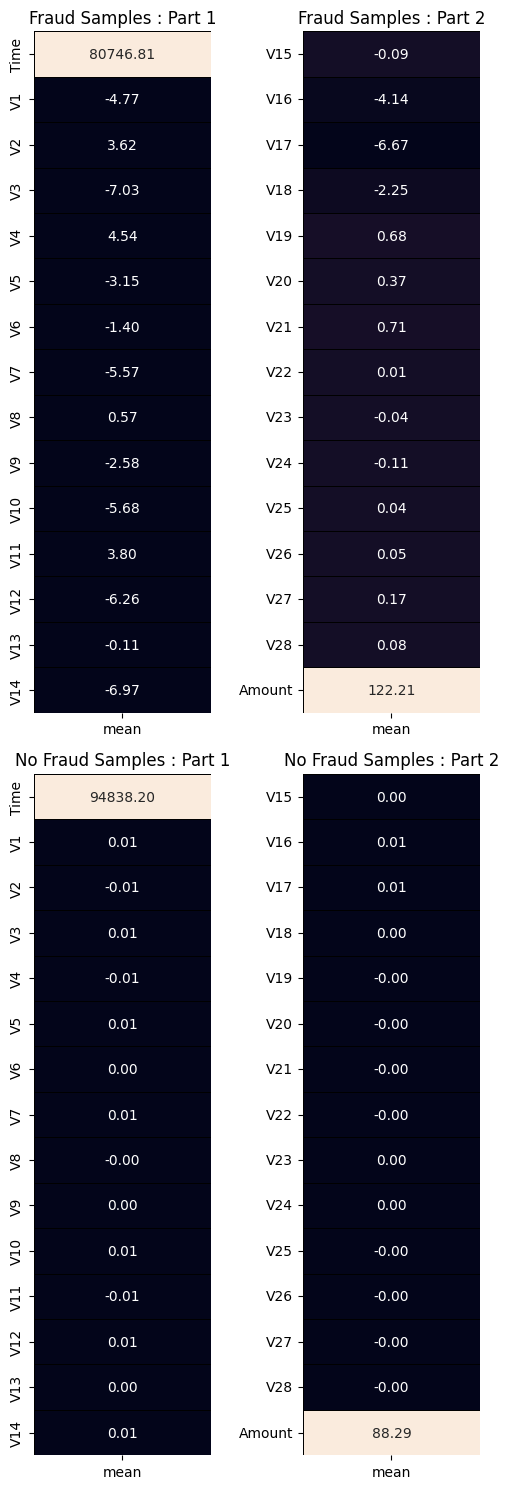

In [14]:
fraud = df[df['Class'] == 1].describe().T
nofraud = df[df['Class'] == 0].describe().T


fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

Use f_classif combine with Kbest to fine K best Important Features

In [17]:
from sklearn.feature_selection import SelectKBest,f_classif

In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
target = df ['Class']
feature = df.loc[:, :'Amount'] # Get all column except Class Col

In [23]:
best_features = SelectKBest(score_func = f_classif, k = 'all') #Find all score of features
fit = best_features.fit(feature, target)

In [28]:
featureScores = pd.DataFrame(data = fit.scores_, index = feature.columns , columns = ['ANOVA Score'])

In [34]:
featureScores.sort_values(by = 'ANOVA Score', ascending = False).head(9)

,ANOVA Score
V17,33979.168593
V14,28695.547788
V12,20749.822361
V10,14057.979985
V16,11443.349428
V3,11014.508305
V7,10349.605408
V11,6999.355047
V4,5163.832114


Nhìn vào cái DF trên ta sẽ lựa chọn ra 9 cái Feature quan trọng nhất

In [41]:
# Select non-contiguous columns
columns_to_select = ['V17', 'V14', 'V12','V10','V16','V3','V7','V11','V4','Class']
df1 = df[columns_to_select]

# Print the selected columns
df1.head(5)

,V17,V14,V12,V10,V16,V3,V7,V11,V4,Class
0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,-0.551600,1.378155,0
1,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,1.612727,0.448154,0
2,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,0.624501,0.379780,0
3,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,-0.226487,-0.863291,0
4,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.822843,0.403034,0


In [50]:
df1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

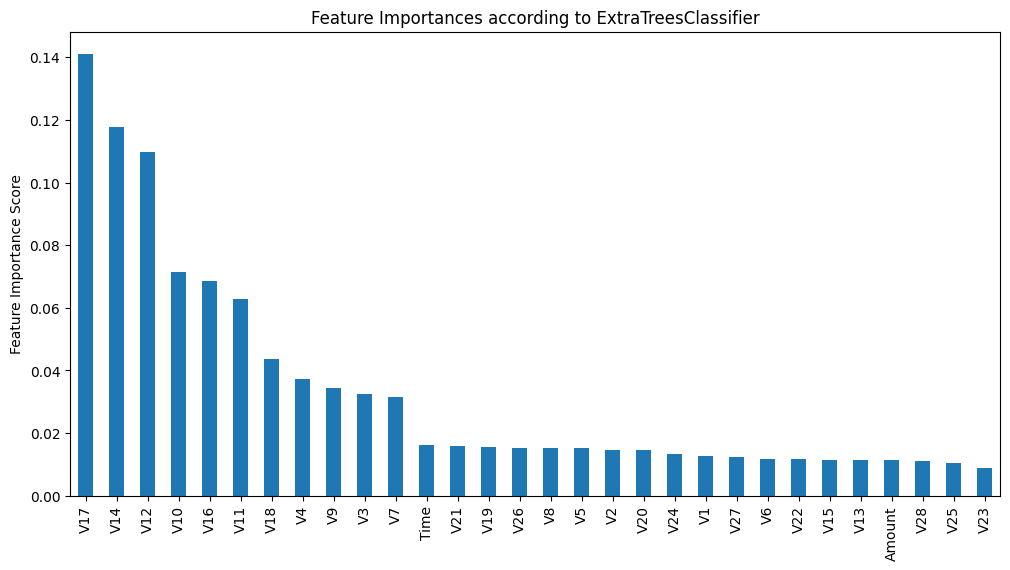

In [46]:
## Requirement 13:
## PUT YOUR CODE HERE:

## Feature selection
clf = ExtraTreesClassifier(random_state=1729)
selector = clf.fit(feature, target)

# plot most important features
feat_imp = pd.Series(clf.feature_importances_, index = feature.columns.values).sort_values(ascending=False)
feat_imp[:].plot(kind='bar', title='Feature Importances according to ExtraTreesClassifier', figsize=(12, 8))
plt.ylabel('Feature Importance Score')
plt.subplots_adjust(bottom=0.3)
# plt.savefig('1.png')
plt.show()

It looks like when we use SelectKBest

Bạn nên sử dụng `SelectKBest` khi:

1. Bạn muốn đánh giá mối quan hệ thống kê giữa từng đặc trưng và biến mục tiêu bằng cách sử dụng các bài kiểm định thống kê như chi-square, ANOVA, vv.
2. Bạn có kiến thức trước hoặc giả thuyết cụ thể về tính quan trọng của một số đặc trưng dựa trên tính chính xác thống kê.
3. Bạn muốn chọn một số lượng cụ thể (k) đặc trưng hàng đầu dựa trên điểm số của chúng.
4. Bạn ưu tiên phương pháp lựa chọn đặc trưng minh bạch và có thể diễn giải dựa trên các chỉ số thống kê.

Bạn nên sử dụng `ExtraTreesClassifier` khi:

1. Bạn muốn đánh giá mức độ quan trọng của các đặc trưng dựa trên khả năng chúng đóng góp vào hiệu suất của mô hình phân loại.
2. Bạn không nhất thiết quan tâm đến các mối quan hệ thống kê cụ thể giữa đặc trưng và biến mục tiêu.
3. Bạn ưu tiên một phương pháp dựa trên cây quyết định và khả năng nắm bắt tương tác giữa các đặc trưng và ranh giới quyết định phức tạp được học bởi tập cây quyết định.
4. Bạn muốn nắm bắt các mối quan hệ phi tuyến và tương tác giữa các đặc trưng.
5. Bạn muốn sử dụng độ quan trọng của đặc trưng để xếp hạng các đặc trưng hoặc lựa chọn những đặc trưng quan trọng nhất.



# Data Balancing

In [42]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We use OVERSAMPLING and UNDERSAMPLING

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [51]:
smote = SMOTE(random_state=42)
t1 = df1['Class']
f1 = df1.loc[:,:'V4']

In [57]:
f1_over,t1_over = smote.fit_resample(f1,t1)

In [59]:
t1_over.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [60]:
rus = RandomUnderSampler(random_state=42)
f1_under, t1_under = rus.fit_resample(f1,t1)

In [61]:
t1_under.value_counts()

0    492
1    492
Name: Class, dtype: int64

# Modeling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [63]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1_over, t1_over, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f1_under, t1_under, test_size = 0.20, random_state = 2)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [72]:
log = LogisticRegression()
log.fit(x_train1, y_train1)

LinearRegression()

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [69]:
# Make predictions on the test set
def eval(classifier):
    y_pred = classifier.predict(x_test1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test1, y_pred)
    confusion = confusion_matrix(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred, average='weighted')
    recall = recall_score(y_test1, y_pred, average='weighted')
    f1 = f1_score(y_test1, y_pred, average='weighted')

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

In [70]:
eval(log)

Accuracy: 0.9364349401192339
Confusion Matrix:
[[55037  1469]
 [ 5760 51460]]
Precision: 0.9389624425632621
Recall: 0.9364349401192339
F1-score: 0.9363594298120257


In [75]:
log.fit(x_train2, y_train2)
y_pred = log.predict(x_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred)
confusion = confusion_matrix(y_test2, y_pred)
precision = precision_score(y_test2, y_pred, average='weighted')
recall = recall_score(y_test2, y_pred, average='weighted')
f1 = f1_score(y_test2, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9543147208121827
Confusion Matrix:
[[94  1]
 [ 8 94]]
Precision: 0.956727590849324
Recall: 0.9543147208121827
F1-score: 0.9543147208121827


In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tree = DecisionTreeClassifier()
tree.fit(x_train1,y_train1)
eval(tree)

Accuracy: 0.9974763906230765
Confusion Matrix:
[[56322   184]
 [  103 57117]]
Precision: 0.9974773775581804
Recall: 0.9974763906230765
F1-score: 0.9974763780576864
